<a href="https://colab.research.google.com/github/SAMashiyane/organophosphate_pro/blob/main/pycaret_organph_hospital_days_v1_end.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-success">
    <h1 align="center">*Pycartet* for Number of days in hospital</h1>
    <h3 align="center">Investigating the relationship between patient variables and the number of days of atropine administration </h3>
</div>

Test for runtime system(GPU OR CPU)

In [1]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



## Importing the libraries

In [5]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **CLASSIFICATION FOR THIS DATA!!**

In [6]:
from pycaret.classification import *


**mount in google drive**

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load 

In [11]:
#Let's Read csv file
data_Total = pd.read_csv("/content/drive/MyDrive/organ_final - corect -clean_class_end.csv")
#Show some records of dataframe
data_Total.sample(4)

,File.Number,Hour.Of.Add,Time.Of.Ingestion,time_duration,Sex,Age,Name.Of.Pesticide,The.Amount.Of.Toxin.Consumed,Reson,Background.Diseases,Sialloreahea,Lacrimation,Miosis,Vomiting,Diarrhea,Sweating,Bradycardia,Rhales,Pneumonia.Aspiration,Bronchospasm,Intubation,Incontinence,Fasciculation,Muscular.Weakness,Parlaysis,Tachycardia,Confusion,Lethargia,Coma,Agitation,Seijure,GCS,Systol,Diastole,T,PR,RR,Cholinestrase.Level.First,Cholinestrase.Level.Last,PH...VBG,PCO2...VBG,PO2...VBG,HCO3...VBG,NA,K,BS,Cr,BUN,WBC,Hb,Hct,PLT,AST,ALT,ALP,Bullos.Of.Atropin,Total.Atropin,Bullos.Pralidoxime,Total.Pralidoxime,Total.Days.Of.Atropin,Total.Days.Of.Pralidoxime,Days.Of.Intubation,ICU.Add,Leng.Of.Hospital.Add,Leng.Class.Hospital.Add,Leng.Of.ICU.Add,EMG.NCV,Outcome
1,518123,13,1,12,Mail,81,pesticide,5,accidental,no,no,no,no,no,no,no,no,no,no,yes,yes,no,no,no,no,no,yes,no,yes,no,no,4,110,70,36.8,80,12,256,387,7.44,29.9,65.0,22.2,144,3.7,142,1.3,24.0,17.1,14.7,31.0,273.0,24.0,12,240,0.5,15.0,200.0,120.0,2,0,0,yes,30,More than ten days,0,0,1
37,463671,17,14,3,Mail,60,pesticide,200,suicidial,no,no,no,no,no,yes,yes,no,no,no,no,no,no,no,no,no,yes,yes,no,yes,no,no,8,160,110,37.0,96,14,4107,409,7.45,25.4,70.0,18.0,138,4.1,98,1.1,34.0,19.8,18.0,38.6,306.0,60.0,78,247,4.0,97.0,0.0,86.0,2,0,0,yes,7,seven-nine,7,0,0
19,468087,22,20,2,Femail,6,pesticide,15,accidental,no,yes,no,no,no,no,no,no,yes,yes,no,no,no,yes,no,no,yes,no,no,no,no,no,15,130,80,36.8,180,29,282,1185,7.16,33.0,45.0,15.0,137,3.8,95,1.3,24.0,8.8,12.1,38.5,309.0,24.0,15,180,0.4,10.0,0.0,600.0,1,0,0,no,11,More than ten days,0,0,0
68,523644,19,12,7,Mail,25,insecticide,100,accidental,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,15,150,83,37.0,203,20,233,734,7.32,29.6,67.4,17.5,138,4.1,146,1.0,36.0,11.2,17.1,48.6,189.0,23.0,16,206,0.5,27.6,0.0,13.0,2,1,0,no,3,one to three,0,0,0


In [16]:
data_sel = data_Total.drop(["File.Number", "Hour.Of.Add", "Time.Of.Ingestion","Leng.Of.Hospital.Add","Outcome"], axis = 1)
data_sel.head()

,time_duration,Sex,Age,Name.Of.Pesticide,The.Amount.Of.Toxin.Consumed,Reson,Background.Diseases,Sialloreahea,Lacrimation,Miosis,Vomiting,Diarrhea,Sweating,Bradycardia,Rhales,Pneumonia.Aspiration,Bronchospasm,Intubation,Incontinence,Fasciculation,Muscular.Weakness,Parlaysis,Tachycardia,Confusion,Lethargia,Coma,Agitation,Seijure,GCS,Systol,Diastole,T,PR,RR,Cholinestrase.Level.First,Cholinestrase.Level.Last,PH...VBG,PCO2...VBG,PO2...VBG,HCO3...VBG,NA,K,BS,Cr,BUN,WBC,Hb,Hct,PLT,AST,ALT,ALP,Bullos.Of.Atropin,Total.Atropin,Bullos.Pralidoxime,Total.Pralidoxime,Total.Days.Of.Atropin,Total.Days.Of.Pralidoxime,Days.Of.Intubation,ICU.Add,Leng.Class.Hospital.Add,Leng.Of.ICU.Add,EMG.NCV
0,23,Femail,46,pesticide,250,suicidial,hepatic,no,no,no,yes,yes,yes,no,no,yes,yes,yes,yes,no,no,no,no,yes,no,yes,no,no,3,120,70,37.0,79,16,423,1367,7.31,52.3,45.0,26.8,141,4.3,168,0.9,39.0,15.7,14.4,39.2,239.0,17.0,11,210,1.0,262.8,0.0,175.0,9,14,84,yes,More than ten days,27,0
1,12,Mail,81,pesticide,5,accidental,no,no,no,no,no,no,no,no,no,no,yes,yes,no,no,no,no,no,yes,no,yes,no,no,4,110,70,36.8,80,12,256,387,7.44,29.9,65.0,22.2,144,3.7,142,1.3,24.0,17.1,14.7,31.0,273.0,24.0,12,240,0.5,15.0,200.0,120.0,2,0,0,yes,More than ten days,0,0
2,7,Mail,38,pesticide,200,suicidial,no,no,no,no,no,no,no,no,yes,yes,yes,yes,no,no,no,no,no,no,no,no,no,no,15,120,90,37.0,75,14,527,3231,7.54,19.0,43.0,12.0,137,3.2,146,0.7,27.0,21.9,19.9,39.1,134.0,21.0,21,218,2.0,689.3,0.0,500.0,12,0,14,yes,More than ten days,24,2
3,2,Mail,58,pesticide,50,suicidial,cardiovascular,yes,no,no,yes,yes,no,no,no,yes,yes,yes,no,yes,no,no,no,no,no,no,no,no,15,110,80,37.0,95,14,10750,4028,7.28,45.0,72.0,21.5,137,3.6,109,0.9,0.0,6.7,12.0,6.7,150.0,92.0,42,200,3.0,4095.0,0.0,196.0,9,0,22,yes,More than ten days,24,1
4,14,Mail,46,insecticide,50,suicidial,diabetes,no,no,no,yes,no,no,no,no,no,yes,yes,no,no,no,no,yes,yes,no,yes,no,no,8,110,60,36.6,88,14,1506,2806,7.32,25.0,65.0,18.0,138,3.3,216,1.5,43.0,11.3,18.9,39.1,257.0,126.0,155,110,1.5,150.0,0.0,500.0,3,0,0,yes,More than ten days,0,0


In [17]:
s=setup(data = data_sel, target = 'Leng.Class.Hospital.Add', session_id=123,train_size = 0.8,use_gpu=True)

,Description,Value
0,session_id,123
1,Target,Leng.Class.Hospital.Add
2,Target Type,Multiclass
3,Label Encoded,"More than ten days: 0, four-six: 1, one to thr..."
4,Original Data,"(105, 63)"
5,Missing Values,False
6,Numeric Features,26
7,Categorical Features,36
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='Leng.Class.Hospital.Add',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=N...
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
                ('dummy', Dummify(target='Leng.

### **Compare Model()**

In [18]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.5833,0.7634,0.5188,0.5347,0.5359,0.4087,0.4359,0.068
dt,Decision Tree Classifier,0.5750,0.7188,0.5167,0.5589,0.5321,0.4103,0.4407,0.017
gbc,Gradient Boosting Classifier,0.5611,0.7743,0.5125,0.5765,0.5438,0.3825,0.3919,0.547
rf,Random Forest Classifier,0.5361,0.7666,0.4521,0.4861,0.4749,0.3047,0.3390,0.520
et,Extra Trees Classifier,0.5278,0.7779,0.4521,0.4776,0.4705,0.3070,0.3329,0.492
svm,SVM - Linear Kernel,0.4736,0.0000,0.4062,0.3948,0.4018,0.2514,0.3003,0.019
lda,Linear Discriminant Analysis,0.4639,0.6073,0.4083,0.4635,0.4407,0.2449,0.2676,0.032
knn,K Neighbors Classifier,0.4597,0.6348,0.4000,0.3946,0.4074,0.2228,0.2384,0.255
ada,Ada Boost Classifier,0.4556,0.7176,0.4271,0.4603,0.4287,0.2607,0.2845,0.111
nb,Naive Bayes,0.4403,0.6315,0.3854,0.4579,0.4242,0.2053,0.2179,0.017


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


In [19]:
top3= compare_models(n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.5833,0.7634,0.5188,0.5347,0.5359,0.4087,0.4359,0.069
dt,Decision Tree Classifier,0.5750,0.7188,0.5167,0.5589,0.5321,0.4103,0.4407,0.019
gbc,Gradient Boosting Classifier,0.5611,0.7743,0.5125,0.5765,0.5438,0.3825,0.3919,0.558
rf,Random Forest Classifier,0.5361,0.7666,0.4521,0.4861,0.4749,0.3047,0.3390,0.508
et,Extra Trees Classifier,0.5278,0.7779,0.4521,0.4776,0.4705,0.3070,0.3329,0.490
svm,SVM - Linear Kernel,0.4736,0.0000,0.4062,0.3948,0.4018,0.2514,0.3003,0.019
lda,Linear Discriminant Analysis,0.4639,0.6073,0.4083,0.4635,0.4407,0.2449,0.2676,0.031
knn,K Neighbors Classifier,0.4597,0.6348,0.4000,0.3946,0.4074,0.2228,0.2384,0.032
ada,Ada Boost Classifier,0.4556,0.7176,0.4271,0.4603,0.4287,0.2607,0.2845,0.116
nb,Naive Bayes,0.4403,0.6315,0.3854,0.4579,0.4242,0.2053,0.2179,0.017


INFO:logs:create_model_container: 28
INFO:logs:master_model_container: 28
INFO:logs:display_container: 3
INFO:logs:[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best

In [20]:
top3

[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
                subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=123, splitter='best'),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                    

## Create a Model

In [21]:
# check available models
models()

INFO:logs:gpu_param set to True


,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [22]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5556,0.8016,0.3750,0.5778,0.5432,0.3455,0.3591
1,0.5556,0.7905,0.5625,0.4333,0.4815,0.3455,0.3665
2,0.6667,0.7143,0.5000,0.6296,0.6148,0.4706,0.5071
3,0.5556,0.8444,0.6250,0.6204,0.5185,0.4286,0.5003
4,0.5000,0.5881,0.3750,0.3500,0.4062,0.2727,0.3034
5,0.3750,0.6875,0.2500,0.2250,0.2812,0.1304,0.1615
6,0.5000,0.8476,0.4583,0.4792,0.4750,0.3191,0.3261
7,0.7500,0.8250,0.7917,0.7500,0.7500,0.6522,0.6522
8,0.7500,0.9125,0.7500,0.5729,0.6464,0.6444,0.6936


INFO:logs:create_model_container: 29
INFO:logs:master_model_container: 29
INFO:logs:display_container: 4
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


## Plot_model

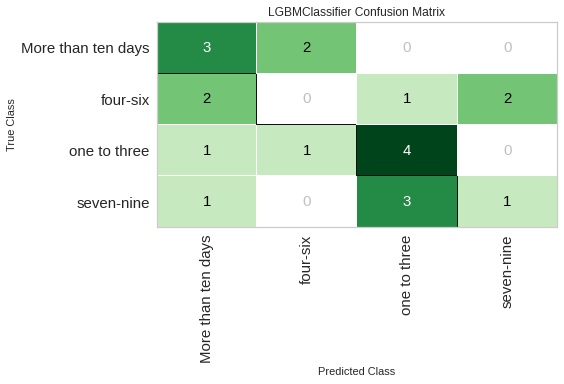

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [23]:
# plot_model(estimator=rf,plot = 'auc')
plot_model(lightgbm, plot = 'confusion_matrix')

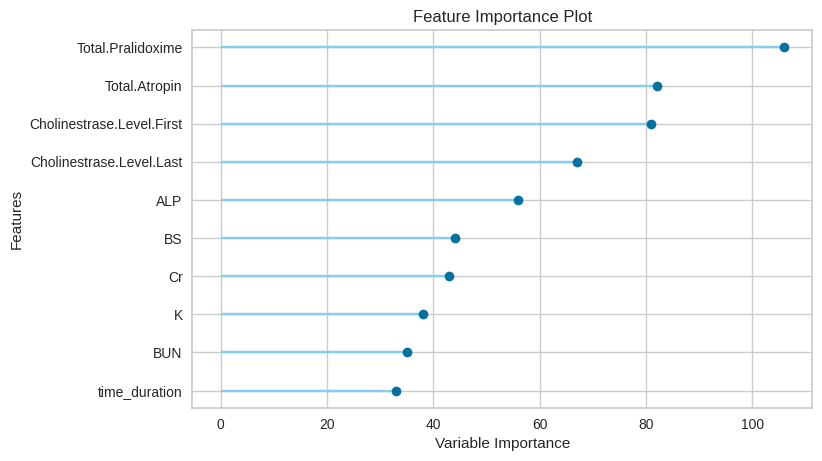

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [24]:
plot_model(lightgbm, plot = 'feature')

## **Ensembling**

In [25]:
lightgbm = create_model('lightgbm')
dt = create_model('dt')
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.8750,0.6875,0.7963,0.6921,0.5424,0.5615
1,0.4444,0.7206,0.4375,0.2778,0.3407,0.1509,0.1690
2,0.7778,0.8651,0.6250,0.7259,0.7210,0.6604,0.6896
3,0.2222,0.6643,0.1250,0.4444,0.2963,-0.0328,-0.0345
4,0.3750,0.6792,0.2917,0.3333,0.3500,0.1489,0.1593
5,0.2500,0.5679,0.1667,0.1250,0.1667,-0.1163,-0.1446
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.5000,0.6988,0.5417,0.5417,0.4792,0.3333,0.3556
8,0.7500,0.8542,0.7500,0.8125,0.7500,0.6596,0.6739


INFO:logs:create_model_container: 32
INFO:logs:master_model_container: 32
INFO:logs:display_container: 7
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [26]:
blend = blend_models([lightgbm,dt,gbc])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.8750,0.6875,0.7963,0.6921,0.5424,0.5615
1,0.4444,0.7587,0.4375,0.2778,0.3407,0.1509,0.1690
2,0.6667,0.8869,0.5000,0.6889,0.6543,0.5000,0.5103
3,0.3333,0.7659,0.2500,0.5000,0.3704,0.1148,0.1250
4,0.6250,0.7077,0.5000,0.6562,0.6131,0.4667,0.4778
5,0.3750,0.6833,0.2917,0.2750,0.3125,0.0909,0.1011
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.7500,0.8250,0.7500,0.7812,0.7381,0.6444,0.6598
8,0.7500,0.9167,0.7500,0.6042,0.6583,0.6596,0.7053


INFO:logs:create_model_container: 33
INFO:logs:master_model_container: 33
INFO:logs:display_container: 8
INFO:logs:VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=123, reg_alpha=0.0,
                                             reg_lambda=0.0, silent=

## **evaluate models**

In [27]:
evaluate_model(lightgbm)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [29]:
evaluate_model(lightgbm)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [30]:
evaluate_model(lightgbm)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [31]:
evaluate_model(lightgbm)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [32]:
evaluate_model(lightgbm)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [33]:
evaluate_model(lightgbm)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [34]:
evaluate_model(lightgbm)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [28]:
evaluate_model(blend)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=123, reg_alpha=0.0,
                                             reg_lambda=0.0, silent='warn',...
                             

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…